# Математика нейронных сетей

### Нейронная сеть со скрытыми слоями
<img src="images/simple_neural_net.png" alt="Synaps" height=30% width=30%>
$$ H = f_1(W_1*I)$$
$$ O = f_2(W_2*H)$$

$W_1$ и $W_2$ - матрицы весов, обучаемые параметры  
$I$ - вектор входных признаков  
$O$ - вектор выхода  
$H$ - вектор скрытого состояния  
$f$ - функция активации

## Геометрическая интерпретация

$ y = W*x + b $ - разделяющая гиперплоскость для каждой координаты $y_i$. 

<img src="images/II2/hyper.png" alt="Synaps" height=30% width=30%>




## Градиентный спуск (Оптимизация модели)

**Градиентный спуск** — метод нахождения локального экстремума (минимума или максимума) функции с помощью движения вдоль градиента.

<img src="images/II2/grad.png" alt="Synaps" height=30% width=30%>
$ x_t $ - координата, отражающая значения всех весов модели ($w_i$, $b_j$) на t итерации

## Кросс энтропия (Фунция потерь)

$y(x_i) = y_i$ - класс объекта $x_i$  
$p(y_i|x_i)$ - вероятнсть принадлежности объекта $x_i$ к классу $y_i$  
Цель: максимизировать вероятность принадлежности элемента правильному классу $p(y_1|x_1), p(y_2|x_2), ...$ по w, b.  
Следовательно, максимизируем произведение $$P = П_ip(y_i|x_i)$$ или же (для удобства) минимизируем 
$$-ln(P) = \Sigma_iln(p(y_i|x_i))$$


**Бинарная кросс энтропия**
$$
CE = -y_1log(pred_1)-(1-y_1)log(1-pred_1)
$$
**Категориальная кросс энтропия**
$$
CE = -\sum_j^Cy_jlog(pred_j)
$$
*C - число классов*



<img src="images/II2/cross_entr.png" alt="Synaps" height=80% width=80%>

## Регуляризация

Одной из основных проблем машинного обучения является проблема переобучения (overfitting), когда модель в погоне за минимизацией затрат на обучение теряет способность к обобщению. Существует простой способ держать переобучение под контролем — метод dropout (зануление случайных весов в процессе обучения).  


Но есть и другие регуляризаторы, которые можно применить к сети. Возможно, самый популярный из них — $L_2$-регуляризация (также называемая сокращением весов, англ. weight decay), которая использует более прямой подход к регуляризации, чем dropout. Обычно первопричиной переобучения является сложность модели (в смысле количества ее параметров), слишком высокая для решаемой задачи и имеющегося обучающего множества. В некотором смысле, задача регуляризатора — понизить сложность модели, сохранив количество ее параметров. $L_2$-регуляризация выполняется посредством наложения штрафов (penalising) на веса с наибольшими значениями, минимизируя их $L_2$-норму с использованием параметра λ — коэффициент регуляризации, выражающий предпочтение минимизации нормы относительно минимизации потерь на обучающем множестве.  

$$ L = L_{CE} + {λ\over2}(||w||^2_2 + ||b||^2_2) $$

## Градиентный спуск (Оптимизация модели)

<img src="images/II2/grad.png" alt="Synaps" height=30% width=30%>

$$\vec w = \vec w - \eta \vec\nabla_wL $$
$$\vec b = \vec b - \eta \vec\nabla_bL $$

$\eta$ - скорость обучения (learning rate)

# Стохастический градиентный спуск

Стохастический градиентный спуск (англ. stochastic gradient descent) − оптимизационный алгоритм, отличающийся от обычного градиентного спуска тем, что градиент оптимизируемой функции считается на каждом шаге не как сумма градиентов от каждого элемента выборки, а как градиент от одного, случайно выбранного элемента, или как сумма градиентов подвыборки batch.

# Граф вычислений
<img src="images/II2/graph.png" alt="Synaps" height=60% width=60%>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Conv2D, Input, Flatten, MaxPool2D
from keras.models import Model
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

from keras.datasets import cifar10

C:\Users\waelin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train: (50000, 32, 32, 3) (50000, 1)
Test: (10000, 32, 32, 3) (10000, 1)


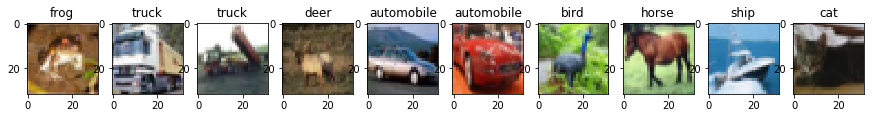

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

print('Train:', x_train.shape, y_train.shape)
print('Test:', x_test.shape, y_test.shape)

plt.figure(figsize=(15, 1.5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i, 0]])
plt.show()

In [3]:


inp = Input(shape=(32, 32, 3))
layer = Conv2D(filters=8, kernel_size=(3, 3), padding='same')(inp)
layer = MaxPool2D(pool_size=(2, 2))(layer)
layer = Conv2D(filters=16, kernel_size=(3, 3), padding='same')(layer)
layer = MaxPool2D(pool_size=(2, 2))(layer)

layer = Flatten()(layer)
layer = Dense(units=128)(layer)
out = Dense(units=10, activation='softmax')(layer)

model = Model(inp, out)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], )

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dens

In [7]:
# Подготовка данных. Разделение на классы и масштабирование
y_train_cl = to_categorical(y_train, num_classes=10)
y_test_cl = to_categorical(y_test, num_classes=10)
x_train_scaled = x_train / 255.
x_test_scaled = x_test / 255.

In [5]:
## Для визуализации графа и процесса обучения в tensordflow и keras используется инструмент tensorboard
from keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs/example1')
# from datetime import datetime
# logdir = "logs/example1/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=logdir)

In [8]:
# Обучение
history = model.fit(x_train_scaled, y_train_cl, validation_data=(x_test_scaled, y_test_cl), 
                    batch_size=32, epochs=10, callbacks=[tensorboard_callback])

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 43s 863us/step - loss: 1.4928 - acc: 0.4764 - val_loss: 1.2773 - val_acc: 0.5503
Epoch 2/10
50000/50000 [==============================] - 44s 883us/step - loss: 1.2418 - acc: 0.5684 - val_loss: 1.1788 - val_acc: 0.5925
Epoch 3/10
50000/50000 [==============================] - 43s 864us/step - loss: 1.1678 - acc: 0.5973 - val_loss: 1.1745 - val_acc: 0.5944
Epoch 4/10
50000/50000 [==============================] - 42s 841us/step - loss: 1.1262 - acc: 0.6107 - val_loss: 1.1543 - val_acc: 0.6020
Epoch 5/10
50000/50000 [==============================] - 43s 854us/step - loss: 1.0938 - acc: 0.6241 - val_loss: 1.1198 - val_acc: 0.6167
Epoch 6/10
50000/50000 [==============================] - 43s 860us/step - loss: 1.0741 - acc: 0.6299 - val_loss: 1.1027 - val_acc: 0.6226
Epoch 7/10
50000/50000 [==============================] - 43s 859us/

tensorbaord запускается с помощью команды
```
tensorboard --logdir <logs path>
```
По умолчанию на **localhost:6006**

# Обратное распространение ошибки. Пример

$$f(x,w) = 1 + e^{w_1x+w_0}$$
<img src="images/II2/back1_1.png" alt="Synaps" height=60% width=60%>

Начальное состояение весов и входного значения
<img src="images/II2/back1_2.png" alt="Synaps" height=60% width=60%>

Посчитаем значения по прямому проходу
<img src="images/II2/back1_3.png" height=60% width=60%>

Для удобства обозначим узлы (подфункции)
<img src="images/II2/back1_4.png" alt="Synaps" height=60% width=60%>

Обратное распространение. Пусть df = 1. Тогда 
$$dc = {df \over dc}df = (c+1)'_{c} * 1 = 1$$
$$db = {dc \over db}dc = (e^b)'_{b} * 1 = e^3 = 20$$
<img src="images/II2/back1_5.png" height=60% width=60%>

$$dw_0 = {db \over dw_0}db = (a+w_0)'_{w_0} * 20 = 20$$
$$da = {db \over da}db = (a+w_0)'_{a} * 20 = 20$$
<img src="images/II2/back1_6.png" height=60% width=60%>

$$dw_1 = {da \over dw_1}da = (x*w_1)'_{w_1} * 20 = x*20 = 20$$
$$dx = {da \over dx}da = (x*w_1)'_{x} * 20 = w_1*20 = 40$$
<img src="images/II2/back1_7.png" height=60% width=60%>

# Обратное распространение ошибки. Пример с матрицами

$$f={1 \over 2} ||X*W||^2_2$$
<img src="images/II2/back2_1.png" height=60% width=60%>

Начальное состояение весов и входного значения
<img src="images/II2/back2_2.png" height=60% width=60%>

Посчитаем значения по прямому проходу
<img src="images/II2/back2_3.png" height=60% width=60%>

Для удобства обозначим узлы (подфункции)  
<img src="images/II2/back2_4.png" height=60% width=60%>

Обратное распространение. Пусть df = 1. Тогда 
$$db = {df \over db}df = ({1 \over 2}b)'_{b} * 1 = 0.5$$
$$da_{ij} = {db \over da_{ij}}db = (a_{ij}^2)'_{a_{ij}} * 0.5 = a_{ij} $$
или $$\nabla_a f = a$$

<img src="images/II2/back2_5.png" height=60% width=60%>

$$\nabla_w f = X^T \nabla_a f$$

<img src="images/II2/back2_6.png" height=60% width=60%>

# Задания  

1. Для данных MNIST построить нейронную сеть с выводом логов для tensorboard. Посмотреть в изменение логов в процессе обучения.
2. Сравнить поведение процесса обучения различными оптимизаторами для модели (графики истории).
3. Изменить структуру сети так, чтобы модель переобучалась (для этого можно использовать тест как валидацию). Посмотреть, как это будут выглядеть графики обучения. (Если не удаётся переобучить, то уменьшить размер тренировочной выборки).  
4. Использовать аугментацию при обучении. Сравнить графики.  